<a href="https://colab.research.google.com/github/Tolulopeelijah/Cats-vs-Dog-classifier/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tolulopeelijah","key":"210a7e92a996c2d01970b24cf756b16f"}'}

In [3]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 97% 788M/812M [00:03<00:00, 235MB/s]
100% 812M/812M [00:03<00:00, 244MB/s]


In [6]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [7]:
 ! unzip train.zip
 ! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os, shutil
import pandas as pd
import numpy as np
from PIL import Image
from random import sample
from math import ceil

In [17]:
print(len(os.listdir('./train')))
print(len(os.listdir('./test1')))

0
12500


In [9]:
path = './data/'
subpaths = ['train/', 'test/']
subsub = ['cats', 'dogs']
for subpath in subpaths:
  for sub in subsub:
    dir = path+subpath+sub
    os.makedirs(dir, exist_ok = True)

In [10]:
init_dest_path = './train/'
dest_path = './data/train/'
#  using 80% of the training set for the training and the other twenty for validation
for img in sample(os.listdir(init_dest_path), ceil(0.8 * len(os.listdir(init_dest_path)))):
  init_dest = init_dest_path + img
  image_class = 'dogs' if img[:3] == 'dog' else 'cats' if img[:3] == 'cat' else 'none'
  if image_class != 'none':
    fin_dest = dest_path + image_class
  shutil.move(init_dest, fin_dest)


for img in (os.listdir(init_dest_path)):
  init_dest = init_dest_path + img
  image_class = 'dogs' if img[:3] == 'dog' else 'cats' if img[:3] == 'cat' else 'none'
  if image_class != 'none':
    fin_dest = './data/test/' + image_class
  shutil.move(init_dest, fin_dest)

In [14]:
print(f'length of cats in train: {len(os.listdir("./data/train/cats/"))}')
print(f'length of dogs in train: {len(os.listdir("./data/train/dogs"))}')
print(f'length of cats in validation: {len(os.listdir("./data/test/cats"))}')
print(f'length of dogs in validation: {len(os.listdir("./data/test/dogs"))}')

length of cats in train: 10010
length of dogs in train: 9990
length of cats in validation: 2490
length of dogs in validation: 2510


In [16]:
10010 + 999 + 2490 + 2510

16009

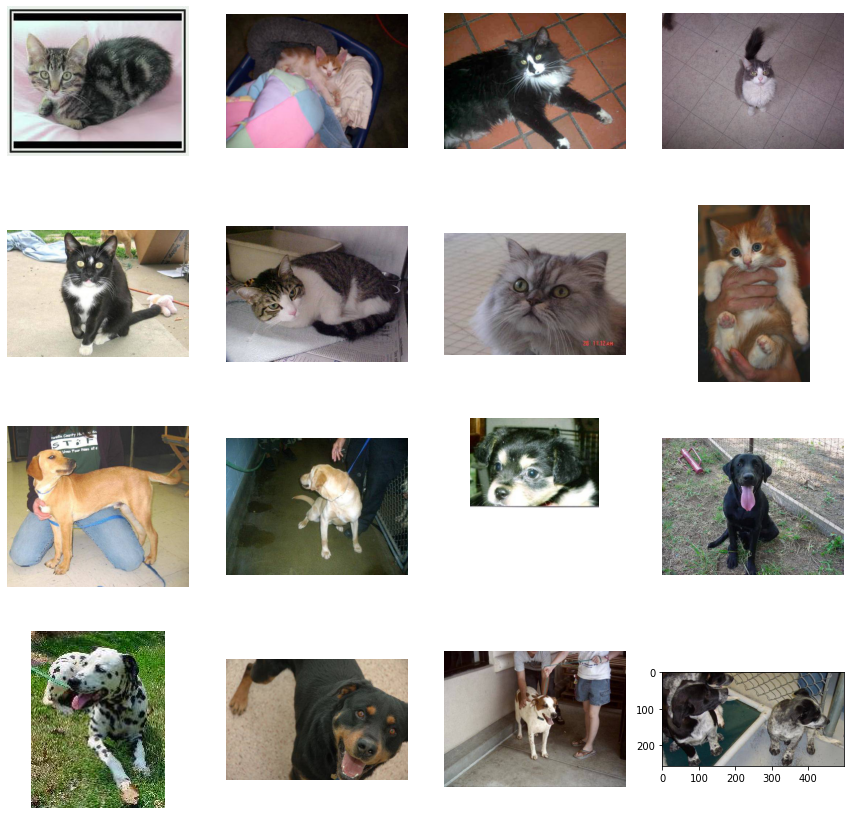

In [24]:
path = './data/train/'
images = os.listdir('./data/train/cats')[:8] + os.listdir('./data/train/dogs')[:8]
plt.figure(figsize = (15,15))
for num, image_name in enumerate(images):
  image_path = path + 'cats/' + image_name if image_name[:3] == 'cat' else path + 'dogs/' + image_name
  img = Image.open(image_path)
  im = np.asarray(img)
  plt.axis('off')
  plt.subplot(4,4, num+1)
  plt.imshow(im)

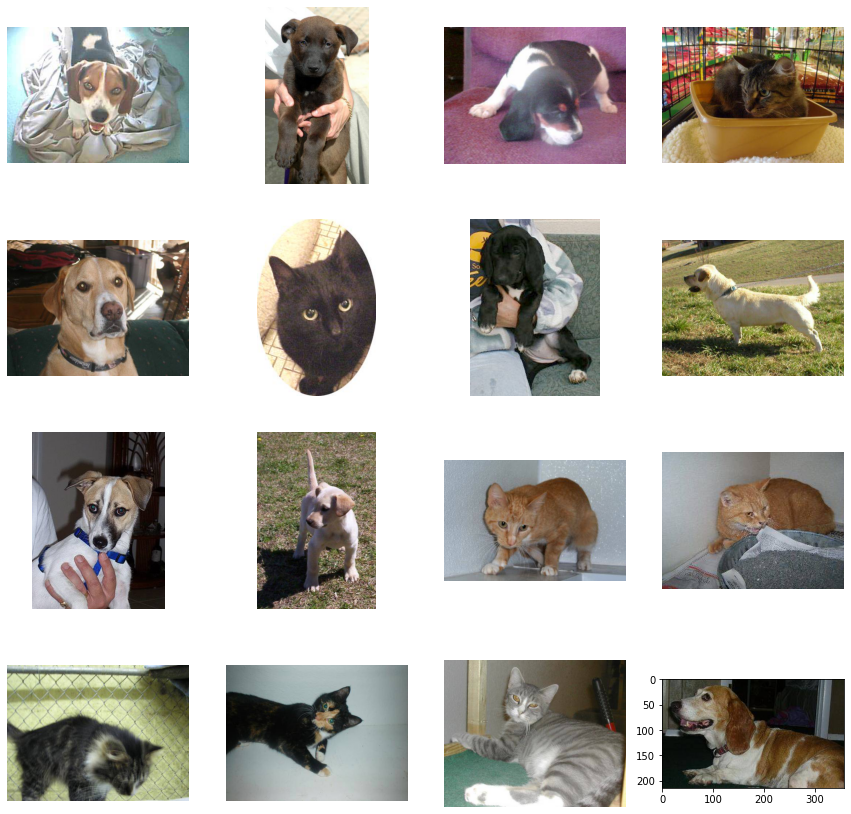

In [25]:
path = './test1/'
plt.figure(figsize = (15,15))
for num, image_name in enumerate(os.listdir(path)[:16]):
  image_path = path + image_name
  img = Image.open(image_path)
  im = np.asarray(img)
  plt.axis('off')
  plt.subplot(4,4, num+1)
  plt.imshow(im)

In [26]:
model = keras.models.Sequential([keras.layers.Conv2D(16, (3,3), input_shape = (300, 300, 3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(500, activation = 'relu'),
                                 keras.layers.Dense(1, activation = 'sigmoid')])

In [39]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.1), loss = keras.losses.BinaryCrossentropy(), metrics = 'accuracy')

In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [40]:
train_data_generator = ImageDataGenerator()
val_data_generator = ImageDataGenerator()

train_data = train_data_generator.flow_from_directory('./data/train', target_size = (300,300), batch_size = 200, class_mode = 'binary')
val_data = val_data_generator.flow_from_directory('./data/test', target_size = (300,300), batch_size = 250, class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_data, 
                    steps_per_epoch = 50,
                    epochs = 10,
                    verbose = 1,
                    validation_data = val_data,
                    validation_steps = 8)

Epoch 1/10
50/50 [==============================] - 50s 985ms/step - loss: 3373.2261 - accuracy: 0.4954 - val_loss: 0.6927 - val_accuracy: 0.5155
Epoch 2/10
50/50 [==============================] - 46s 918ms/step - loss: 0.6947 - accuracy: 0.4980 - val_loss: 0.6930 - val_accuracy: 0.5085
Epoch 3/10
50/50 [==============================] - 47s 930ms/step - loss: 0.6938 - accuracy: 0.4933 - val_loss: 0.6933 - val_accuracy: 0.4900
Epoch 4/10
50/50 [==============================] - 48s 957ms/step - loss: 0.6942 - accuracy: 0.5045 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 5/10
50/50 [==============================] - 46s 911ms/step - loss: 0.6937 - accuracy: 0.5006 - val_loss: 0.6936 - val_accuracy: 0.4990
Epoch 6/10
27/50 [===============>..............] - ETA: 17s - loss: 0.6937 - accuracy: 0.4996